In [31]:
import zipfile
import urllib

import tensorflow as tf
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [32]:
# Setting Seaborn Theme
sns.set_theme(style="whitegrid", font_scale=1.4)

plt.rcParams["figure.figsize"] = (12,7)

In [33]:
def get_data(city,start_year,end_year):

    years = np.arange(start_year,end_year+1,1)
    files_path = []

    for year in years:

        zip_url = f"https://portal.inmet.gov.br/uploads/dadoshistoricos/{year}.zip"
        zip_file = zip_url.split('/')[-1]
        urllib.request.urlretrieve(zip_url, zip_file)

        with zipfile.ZipFile(zip_file, "r") as f:
            for name in f.namelist():
                if city in name.lower():
                  print(f"{city.upper}\nYear:{year}\n_____________________________________")
                  f.extract(name, path=None, pwd=None)
                  files_path.append(name)

    return files_path

def read_file(file):
    temp_df = pd.read_csv(file,sep=';',header=8, encoding='latin-1')
    columns_selected = [0,1,3,7]
    temp_df = temp_df[temp_df.columns[columns_selected]]

    actual_columns = temp_df.columns.to_list()
    new_columns = {}

    new_columns[actual_columns[0]] = 'date'
    new_columns[actual_columns[1]] = 'hour'
    new_columns[actual_columns[2]] = 'p (mB)'
    new_columns[actual_columns[3]] = 'Temperature'

    temp_df.rename(columns=new_columns, inplace=True)

    return temp_df

def create_dataframe(csvs_path_list):

    df = pd.concat([read_file(file) for file in csvs_path_list], axis=0)
    df['date'] = df['date'].str.replace('/','-')
    df['hour'] = df['hour'].apply(lambda x: x[:2])

    df['datetime'] = df['date'] + ' ' + df['hour']
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H')

    df.drop(['date','hour'],axis=1,inplace=True)
    df.set_index('datetime',inplace=True)

    df['p (mB)'] = df['p (mB)'].str.replace(',','.')
    df['Temperature'] = df['Temperature'].str.replace(',','.')

    df['p (mB)'] = df['p (mB)'].astype(float)
    df['Temperature'] = df['Temperature'].astype(float)

    df = df.replace(-9999.0, np.nan)

    df['p (mB)'] = df['p (mB)'].interpolate()
    df['Temperature'] = df['Temperature'].interpolate()

    return df

In [34]:
files_path = get_data('brasilia',2011,2020)

<built-in method upper of str object at 0x7feb729c87b0>
Year:2011
_____________________________________
<built-in method upper of str object at 0x7feb729c87b0>
Year:2012
_____________________________________
<built-in method upper of str object at 0x7feb729c87b0>
Year:2013
_____________________________________
<built-in method upper of str object at 0x7feb729c87b0>
Year:2014
_____________________________________
<built-in method upper of str object at 0x7feb729c87b0>
Year:2015
_____________________________________
<built-in method upper of str object at 0x7feb729c87b0>
Year:2016
_____________________________________
<built-in method upper of str object at 0x7feb729c87b0>
Year:2017
_____________________________________
<built-in method upper of str object at 0x7feb729c87b0>
Year:2018
_____________________________________
<built-in method upper of str object at 0x7feb729c87b0>
Year:2019
_____________________________________
<built-in method upper of str object at 0x7feb729c87b0>
Year:202

In [35]:
temp_df = pd.read_csv(files_path[0],sep=';',header=8, encoding='latin-1')
temp_df.head()

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2011-01-01,00:00,0,"881,8","881,8",881,-9999,"19,2","18,3","19,4","19,2","18,5","18,3",95,94,95,342,"5,8","3,4",NaN
1,2011-01-01,01:00,0,"882,4","882,4","881,7",-9999,"19,3","18,2","19,3","19,2","18,4","18,2",95,93,93,334,"5,6","2,2",NaN
2,2011-01-01,02:00,0,"882,7","882,7","882,4",-9999,"19,1","18,3","19,3","19,1","18,3","18,2",95,93,95,347,"5,6",3,NaN
3,2011-01-01,03:00,6,"882,6","882,9","882,6",",3","18,1","17,6","19,1","18,1","18,4","17,6",97,95,96,310,"7,9","3,7",NaN
4,2011-01-01,04:00,3,882,"882,6",882,-9999,"17,7","17,2","18,2","17,7","17,6","17,1",97,96,96,335,"6,7","2,4",NaN


In [36]:
print(* (f"{i}: {col}" for i,col in enumerate(temp_df.columns)), sep='\n')

0: DATA (YYYY-MM-DD)
1: HORA (UTC)
2: PRECIPITAÇÃO TOTAL, HORÁRIO (mm)
3: PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)
4: PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)
5: PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
6: RADIACAO GLOBAL (KJ/m²)
7: TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)
8: TEMPERATURA DO PONTO DE ORVALHO (°C)
9: TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)
10: TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)
11: TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)
12: TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)
13: UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)
14: UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)
15: UMIDADE RELATIVA DO AR, HORARIA (%)
16: VENTO, DIREÇÃO HORARIA (gr) (° (gr))
17: VENTO, RAJADA MAXIMA (m/s)
18: VENTO, VELOCIDADE HORARIA (m/s)
19: Unnamed: 19


In [37]:
columns_selected = [0,1,3,7]
temp_df = temp_df[temp_df.columns[columns_selected]]
print(* (f"{i}: {col}" for i,col in enumerate(temp_df.columns)), sep='\n')

actual_columns = temp_df.columns.to_list()
new_columns = {}

new_columns[actual_columns[0]] = 'date'
new_columns[actual_columns[1]] = 'hour'
new_columns[actual_columns[2]] = 'p (mB)'
new_columns[actual_columns[3]] = 'Temperature'

temp_df.rename(columns=new_columns, inplace=True)

0: DATA (YYYY-MM-DD)
1: HORA (UTC)
2: PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)
3: TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)


In [38]:
temp_df

,date,hour,p (mB),Temperature
0,2011-01-01,00:00,"881,8","19,2"
1,2011-01-01,01:00,"882,4","19,3"
2,2011-01-01,02:00,"882,7","19,1"
3,2011-01-01,03:00,"882,6","18,1"
4,2011-01-01,04:00,882,"17,7"
...,...,...,...,...
8755,2011-12-31,19:00,"881,9",26
8756,2011-12-31,20:00,882,"21,7"
8757,2011-12-31,21:00,"882,4","21,4"
8758,2011-12-31,22:00,883,"19,8"


In [93]:
def read_file(file):
    temp_df = pd.read_csv(file,sep=';',header=8, encoding='latin-1')
    columns_selected = [0,1,3,7]
    temp_df = temp_df[temp_df.columns[columns_selected]]

    actual_columns = temp_df.columns.to_list()
    new_columns = {}

    new_columns[actual_columns[0]] = 'date'
    new_columns[actual_columns[1]] = 'hour'
    new_columns[actual_columns[2]] = 'p (mB)'
    new_columns[actual_columns[3]] = 'Temperature'

    temp_df.rename(columns=new_columns, inplace=True)

    return temp_df

def create_dataframe(csvs_path_list):

    df = pd.concat([read_file(file) for file in csvs_path_list], axis=0)
    df['date'] = df['date'].str.replace('/','-')
    df['hour'] = df['hour'].apply(lambda x: x[:2])

    df['datetime'] = df['date'] + ' ' + df['hour']
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H')

    df.drop(['date','hour'],axis=1,inplace=True)
    df.set_index('datetime',inplace=True)

    df['p (mB)'] = df['p (mB)'].str.replace(',','.')
    df['Temperature'] = df['Temperature'].str.replace(',','.')

    df['p (mB)'] = df['p (mB)'].astype(float)
    df['Temperature'] = df['Temperature'].astype(float)

    df = df.replace(-9999.0, np.nan)

    df['p (mB)'] = df['p (mB)'].interpolate()
    df['Temperature'] = df['Temperature'].interpolate()

    return df

In [94]:
df = create_dataframe(csvs_path_list=files_path)

In [41]:
nan_index = df.loc[df['p (mB)'] == df['p (mB)'].min()].index

In [42]:
df = df.replace(-9999.0, np.nan)

In [43]:
df.isnull().sum()

p (mB)         115
Temperature    116
dtype: int64

In [44]:
df['p (mB)'] = df['p (mB)'].interpolate()
df['Temperature'] = df['Temperature'].interpolate()

In [45]:
temperature_df = df['Temperature']

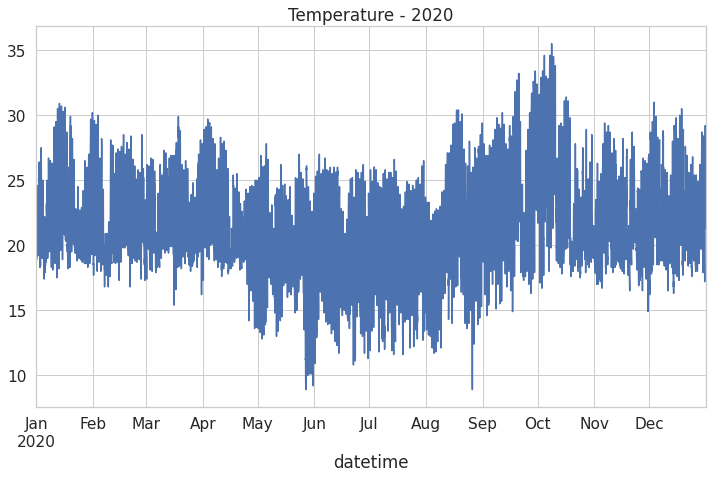

In [46]:
temperature_df['2020':].plot(title='Temperature - 2020')

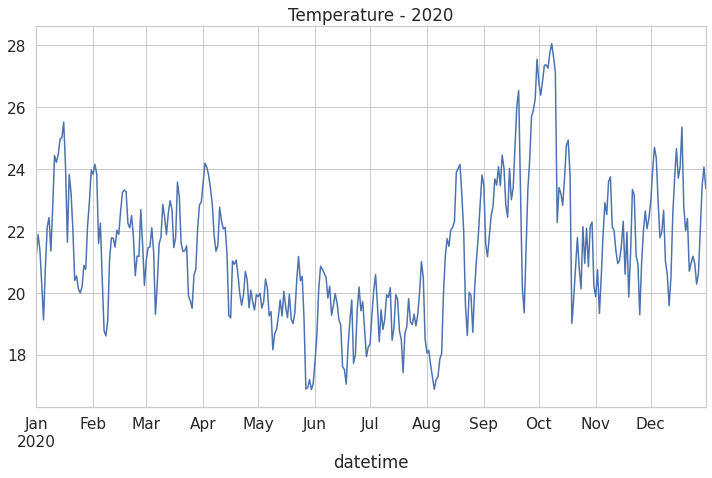

In [47]:
temperature_df['2020':].resample('D').mean().plot(title='Temperature - 2020')

In [48]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [49]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temperature_df, WINDOW_SIZE)
X1.shape, y1.shape

((87667, 5, 1), (87667,))

In [50]:
total_len = len(X1)
test_val_len = int(total_len * 0.10)
train_len = total_len - (2*test_val_len)

In [51]:
X_train1, y_train1 = X1[:train_len], y1[:train_len]
X_val1, y_val1 = X1[train_len:train_len + test_val_len], y1[train_len:train_len + test_val_len]
X_test1, y_test1 = X1[train_len + test_val_len:], y1[train_len + test_val_len:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((70135, 5, 1), (70135,), (8766, 5, 1), (8766,), (8766, 5, 1), (8766,))

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [53]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [54]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
2192/2192 [==============================] - 15s 6ms/step - loss: 112.1704 - root_mean_squared_error: 10.5911 - val_loss: 7.7979 - val_root_mean_squared_error: 2.7925


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
2192/2192 [==============================] - 12s 6ms/step - loss: 2.7955 - root_mean_squared_error: 1.6720 - val_loss: 1.7784 - val_root_mean_squared_error: 1.3336


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
2192/2192 [==============================] - 13s 6ms/step - loss: 1.2885 - root_mean_squared_error: 1.1351 - val_loss: 1.4209 - val_root_mean_squared_error: 1.1920


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
2192/2192 [==============================] - 12s 6ms/step - loss: 1.2017 - root_mean_squared_error: 1.0962 - val_loss: 1.3849 - val_root_mean_squared_error: 1.1768


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
2192/2192 [==============================] - 12s 6ms/step - loss: 1.1752 - root_mean_squared_error: 1.0841 - val_loss: 1.3439 - val_root_mean_squared_error: 1.1593


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
2192/2192 [==============================] - 15s 7ms/step - loss: 1.1617 - root_mean_squared_error: 1.0778 - val_loss: 1.3340 - val_root_mean_squared_error: 1.1550


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
2192/2192 [==============================] - 21s 10ms/step - loss: 1.1496 - root_mean_squared_error: 1.0722 - val_loss: 1.3214 - val_root_mean_squared_error: 1.1495


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/10
2192/2192 [==============================] - 23s 11ms/step - loss: 1.1439 - root_mean_squared_error: 1.0695 - val_loss: 1.3179 - val_root_mean_squared_error: 1.1480


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/10
2192/2192 [==============================] - 21s 10ms/step - loss: 1.1389 - root_mean_squared_error: 1.0672 - val_loss: 1.3152 - val_root_mean_squared_error: 1.1468


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/10
2192/2192 [==============================] - 24s 11ms/step - loss: 1.1359 - root_mean_squared_error: 1.0658 - val_loss: 1.3172 - val_root_mean_squared_error: 1.1477


In [55]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [56]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,17.676220,18.2
1,18.346634,17.8
2,17.992737,18.0
3,18.439671,17.9
4,18.299328,17.9
...,...,...
70130,18.542152,18.2
70131,18.609730,18.4
70132,18.919842,18.0
70133,18.344669,18.7


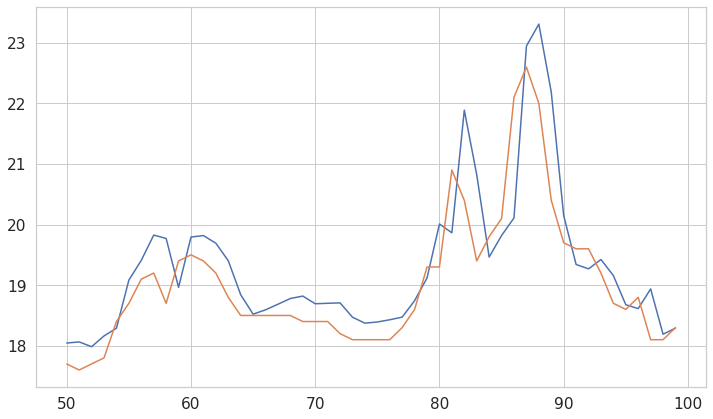

In [57]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [58]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,19.550808,19.6
1,20.301918,22.2
2,23.541950,24.2
3,25.448238,24.8
4,25.653812,23.4
...,...,...
8761,23.470852,24.0
8762,25.043045,22.8
8763,23.009850,21.6
8764,21.325150,24.6


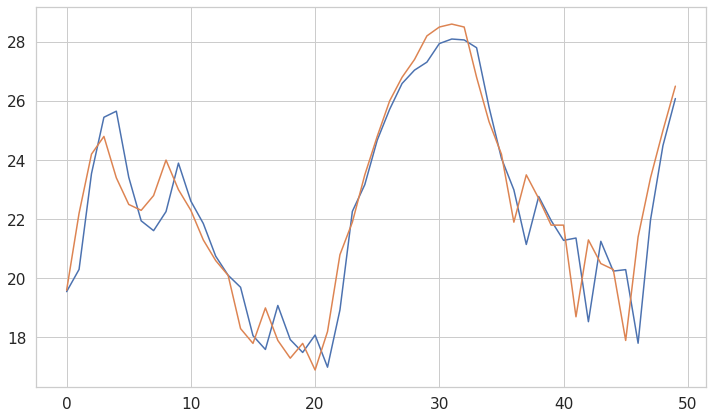

In [59]:
plt.plot(val_results['Val Predictions'][:50])
plt.plot(val_results['Actuals'][:50])

In [60]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,24.168682,20.0
1,20.019218,22.3
2,21.960865,23.9
3,23.710472,23.9
4,23.823391,21.7
...,...,...
8761,27.306305,28.1
8762,27.088631,23.6
8763,22.916912,23.6
8764,22.509251,22.3


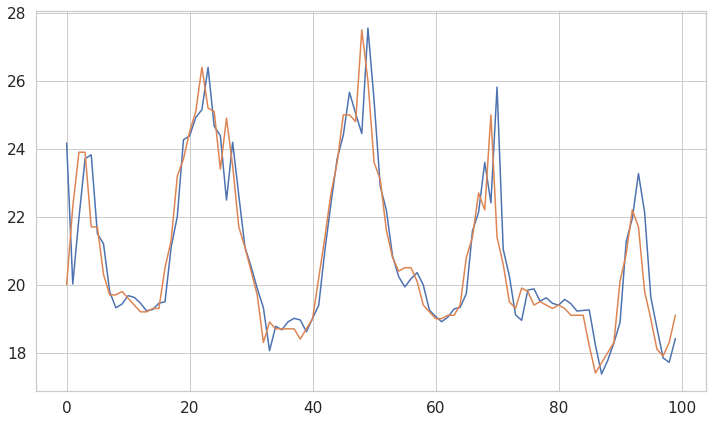

In [61]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [62]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

In [88]:
def train_model_conv1d(X_train, y_train, X_val, y_val, model_name, epochs=10, learning_rate=0.0001):
  model = Sequential()
  model.add(InputLayer((5, 1)))
  model.add(Conv1D(64, kernel_size=2))
  model.add(Flatten())
  model.add(Dense(8, 'relu'))
  model.add(Dense(1, 'linear'))


  cp = ModelCheckpoint(f'{model_name}/', save_best_only=True)
  model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=learning_rate), metrics=[RootMeanSquaredError()])

  model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[cp])

  return model

In [63]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 2056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [65]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
2192/2192 [==============================] - 5s 2ms/step - loss: 24.5832 - root_mean_squared_error: 4.9581 - val_loss: 2.5338 - val_root_mean_squared_error: 1.5918
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 2/10
2192/2192 [==============================] - 4s 2ms/step - loss: 1.7317 - root_mean_squared_error: 1.3159 - val_loss: 1.7263 - val_root_mean_squared_error: 1.3139
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 3/10
2192/2192 [==============================] - 4s 2ms/step - loss: 1.3685 - root_mean_squared_error: 1.1698 - val_loss: 1.4887 - val_root_mean_squared_error: 1.2201
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 4/10
2192/2192 [==============================] - 5s 2ms/step - loss: 1.2797 - root_mean_squared_error: 1.1312 - val_loss: 1.4392 - val_root_mean_squared_error: 1.1996
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 5/10
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2582 - root_mean_squared_error: 1.1217 - val_loss: 1.4408 - val_root_mean_squared_error: 1.2003
Epoch 6/10
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2498 - root_mean_squared_error: 1.1180 - val_loss: 1.4251 - val_root_mean_squared_error: 1.1938
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 7/10
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2485 - root_mean_squared_error: 1.1174 - val_loss: 1.4367 - val_root_mean_squared_error: 1.1986
Epoch 8/10
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2487 - root_mean_squared_error: 1.1174 - val_loss: 1.4534 - val_root_mean_squared_error: 1.2056
Epoch 9/10
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2468 - root_mean_squared_error: 1.1166 - val_loss: 1.4195 - val_root_mean_squared_error: 1.1914
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 10/10
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2446 - root_mean_squared_error: 1.1156 - val_loss: 1.4150 - val_root_mean_squared_error: 1.1895
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


In [66]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [67]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [68]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
2192/2192 [==============================] - 15s 6ms/step - loss: 179.4865 - root_mean_squared_error: 13.3973 - val_loss: 14.4453 - val_root_mean_squared_error: 3.8007


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 2/10
2192/2192 [==============================] - 14s 6ms/step - loss: 4.0160 - root_mean_squared_error: 2.0040 - val_loss: 2.0650 - val_root_mean_squared_error: 1.4370


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 3/10
2192/2192 [==============================] - 12s 6ms/step - loss: 1.3666 - root_mean_squared_error: 1.1690 - val_loss: 1.4754 - val_root_mean_squared_error: 1.2147


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 4/10
2192/2192 [==============================] - 13s 6ms/step - loss: 1.2079 - root_mean_squared_error: 1.0990 - val_loss: 1.3975 - val_root_mean_squared_error: 1.1821


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 5/10
2192/2192 [==============================] - 13s 6ms/step - loss: 1.1684 - root_mean_squared_error: 1.0809 - val_loss: 1.3486 - val_root_mean_squared_error: 1.1613


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 6/10
2192/2192 [==============================] - 13s 6ms/step - loss: 1.1492 - root_mean_squared_error: 1.0720 - val_loss: 1.3305 - val_root_mean_squared_error: 1.1535


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 7/10
2192/2192 [==============================] - 13s 6ms/step - loss: 1.1418 - root_mean_squared_error: 1.0685 - val_loss: 1.3431 - val_root_mean_squared_error: 1.1589
Epoch 8/10
2192/2192 [==============================] - 13s 6ms/step - loss: 1.1371 - root_mean_squared_error: 1.0663 - val_loss: 1.3140 - val_root_mean_squared_error: 1.1463


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 9/10
2192/2192 [==============================] - 14s 6ms/step - loss: 1.1325 - root_mean_squared_error: 1.0642 - val_loss: 1.4001 - val_root_mean_squared_error: 1.1833
Epoch 10/10
2192/2192 [==============================] - 14s 6ms/step - loss: 1.1318 - root_mean_squared_error: 1.0639 - val_loss: 1.3094 - val_root_mean_squared_error: 1.1443


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


In [69]:
temp_df = pd.DataFrame({'Temperature':temperature_df})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
datetime,,
2011-01-01 00:00:00,19.2,1.293840e+09
2011-01-01 01:00:00,19.3,1.293844e+09
2011-01-01 02:00:00,19.1,1.293847e+09
2011-01-01 03:00:00,18.1,1.293851e+09
2011-01-01 04:00:00,17.7,1.293854e+09
...,...,...
2020-12-31 19:00:00,28.1,1.609441e+09
2020-12-31 20:00:00,23.6,1.609445e+09
2020-12-31 21:00:00,23.6,1.609448e+09


In [70]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,
2011-01-01 00:00:00,19.2,1.293840e+09,-7.057106e-12,1.000000,0.000989,1.000000
2011-01-01 01:00:00,19.3,1.293844e+09,2.588190e-01,0.965926,0.001706,0.999999
2011-01-01 02:00:00,19.1,1.293847e+09,5.000000e-01,0.866025,0.002423,0.999997
2011-01-01 03:00:00,18.1,1.293851e+09,7.071068e-01,0.707107,0.003140,0.999995
2011-01-01 04:00:00,17.7,1.293854e+09,8.660254e-01,0.500000,0.003856,0.999993


In [71]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
2011-01-01 00:00:00,19.2,-7.057106e-12,1.000000,0.000989,1.000000
2011-01-01 01:00:00,19.3,2.588190e-01,0.965926,0.001706,0.999999
2011-01-01 02:00:00,19.1,5.000000e-01,0.866025,0.002423,0.999997
2011-01-01 03:00:00,18.1,7.071068e-01,0.707107,0.003140,0.999995
2011-01-01 04:00:00,17.7,8.660254e-01,0.500000,0.003856,0.999993


In [72]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [73]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((87666, 6, 5), (87666,))

In [74]:
total_len = len(X2)
test_val_len = int(total_len * 0.10)
train_len = total_len - (2*test_val_len)

In [75]:
X2_train, y2_train = X2[:train_len], y2[:train_len]
X2_val, y2_val = X2[train_len:train_len + test_val_len], y2[train_len:train_len + test_val_len]
X2_test, y2_test = X2[train_len + test_val_len:], y2[train_len + test_val_len:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((70134, 6, 5), (70134,), (8766, 6, 5), (8766,), (8766, 6, 5), (8766,))

In [76]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [77]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 2.46936515e-01,  1.27970306e-11, -1.00000000e+00,
          6.45099666e-03,  9.99979192e-01],
        [ 6.71751625e-01, -2.58819045e-01, -9.65925826e-01,
          7.16776241e-03,  9.99974311e-01],
        [ 3.53140293e-01, -5.00000000e-01, -8.66025404e-01,
          7.88452447e-03,  9.99968917e-01],
        [ 3.45289604e-02, -7.07106781e-01, -7.07106781e-01,
          8.60128248e-03,  9.99963008e-01],
        [ 8.31057292e-01, -8.66025404e-01, -5.00000000e-01,
          9.31803607e-03,  9.99956586e-01],
        [ 8.04506347e-01, -9.65925826e-01, -2.58819045e-01,
          1.00347849e-02,  9.99949650e-01]],

       [[ 6.71751625e-01, -2.58819045e-01, -9.65925826e-01,
          7.16776241e-03,  9.99974311e-01],
        [ 3.53140293e-01, -5.00000000e-01, -8.66025404e-01,
          7.88452447e-03,  9.99968917e-01],
        [ 3.45289604e-02, -7.07106781e-01, -7.07106781e-01,
          8.60128248e-03,  9.99963008e-01],
        [ 8.31057292e-01, -8.66025404e-01, -5.00000000e-01,
  

In [78]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [79]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [80]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
2192/2192 [==============================] - 15s 6ms/step - loss: 120.1809 - root_mean_squared_error: 10.9627 - val_loss: 8.4859 - val_root_mean_squared_error: 2.9131


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 2/10
2192/2192 [==============================] - 12s 5ms/step - loss: 3.6576 - root_mean_squared_error: 1.9125 - val_loss: 2.2826 - val_root_mean_squared_error: 1.5108


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 3/10
2192/2192 [==============================] - 12s 5ms/step - loss: 1.4995 - root_mean_squared_error: 1.2245 - val_loss: 1.4702 - val_root_mean_squared_error: 1.2125


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 4/10
2192/2192 [==============================] - 12s 5ms/step - loss: 1.1336 - root_mean_squared_error: 1.0647 - val_loss: 1.2061 - val_root_mean_squared_error: 1.0982


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 5/10
2192/2192 [==============================] - 12s 6ms/step - loss: 0.9890 - root_mean_squared_error: 0.9945 - val_loss: 1.0948 - val_root_mean_squared_error: 1.0463


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 6/10
2192/2192 [==============================] - 12s 5ms/step - loss: 0.9238 - root_mean_squared_error: 0.9612 - val_loss: 1.0515 - val_root_mean_squared_error: 1.0254


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 7/10
2192/2192 [==============================] - 12s 5ms/step - loss: 0.8997 - root_mean_squared_error: 0.9485 - val_loss: 1.0325 - val_root_mean_squared_error: 1.0161


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 8/10
2192/2192 [==============================] - 12s 6ms/step - loss: 0.8889 - root_mean_squared_error: 0.9428 - val_loss: 1.0198 - val_root_mean_squared_error: 1.0098


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 9/10
2192/2192 [==============================] - 12s 5ms/step - loss: 0.8818 - root_mean_squared_error: 0.9390 - val_loss: 1.0183 - val_root_mean_squared_error: 1.0091


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 10/10
2192/2192 [==============================] - 12s 6ms/step - loss: 0.8772 - root_mean_squared_error: 0.9366 - val_loss: 1.0208 - val_root_mean_squared_error: 1.0103


(      Predictions  Actuals
 0       24.061874     20.0
 1       20.012178     22.3
 2       21.832117     23.9
 3       22.881659     23.9
 4       22.639341     21.7
 ...           ...      ...
 8761    27.625896     28.1
 8762    27.081556     23.6
 8763    22.664391     23.6
 8764    22.704975     22.3
 8765    21.555908     21.3
 
 [8766 rows x 2 columns], 0.9134713960586293)

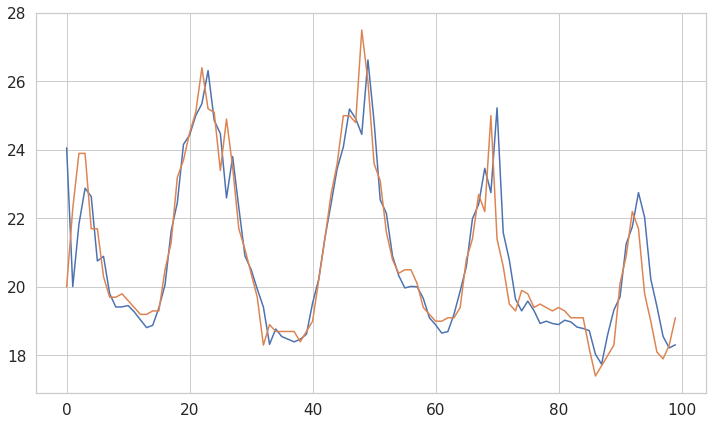

In [82]:
plot_predictions1(model4, X2_test, y2_test)

In [89]:
def train_model_conv1d(X_train, y_train, X_val, y_val, model_name, epochs=10, learning_rate=0.0001):
  model = Sequential()
  model.add(InputLayer((5, 1)))
  model.add(Conv1D(64, kernel_size=2))
  model.add(Flatten())
  model.add(Dense(8, 'relu'))
  model.add(Dense(1, 'linear'))


  cp = ModelCheckpoint(f'{model_name}/', save_best_only=True)
  model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=learning_rate), metrics=[RootMeanSquaredError()])

  model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[cp])

  return model

In [90]:
%%time
test_model = train_model_conv1d(X_train1, y_train1, X_val1, y_val1, 'test_model', epochs=100)

Epoch 1/100
2192/2192 [==============================] - 4s 2ms/step - loss: 24.0584 - root_mean_squared_error: 4.9049 - val_loss: 2.9800 - val_root_mean_squared_error: 1.7263
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 2/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.8432 - root_mean_squared_error: 1.3577 - val_loss: 1.6942 - val_root_mean_squared_error: 1.3016
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 3/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.3689 - root_mean_squared_error: 1.1700 - val_loss: 1.4972 - val_root_mean_squared_error: 1.2236
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 4/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2808 - root_mean_squared_error: 1.1317 - val_loss: 1.4551 - val_root_mean_squared_error: 1.2063
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 5/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2590 - root_mean_squared_error: 1.1221 - val_loss: 1.4351 - val_root_mean_squared_error: 1.1980
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 6/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2524 - root_mean_squared_error: 1.1191 - val_loss: 1.4277 - val_root_mean_squared_error: 1.1949
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 7/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2497 - root_mean_squared_error: 1.1179 - val_loss: 1.4177 - val_root_mean_squared_error: 1.1907
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 8/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2472 - root_mean_squared_error: 1.1168 - val_loss: 1.4254 - val_root_mean_squared_error: 1.1939
Epoch 9/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2490 - root_mean_squared_error: 1.1176 - val_loss: 1.4377 - val_root_mean_squared_error: 1.1990
Epoch 10/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2461 - root_mean_squared_error: 1.1163 - val_loss: 1.4228 - val_root_mean_squared_error: 1.1928
Epoch 11/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2473 - root_mean_squared_error: 1.1168 - val_loss: 1.4496 - val_root_mean_squared_error: 1.2040
Epoch 12/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2470 - root_mean_squared_error: 1.1167 - val_loss: 1.4221 - val_root_mean_squared_error: 1.1925
Epoch 13/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2459 - root_mean_squared_error: 1.1162 - v

INFO:tensorflow:Assets written to: test_model/assets


Epoch 15/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2462 - root_mean_squared_error: 1.1163 - val_loss: 1.4237 - val_root_mean_squared_error: 1.1932
Epoch 16/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2447 - root_mean_squared_error: 1.1157 - val_loss: 1.4292 - val_root_mean_squared_error: 1.1955
Epoch 17/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2445 - root_mean_squared_error: 1.1156 - val_loss: 1.4623 - val_root_mean_squared_error: 1.2092
Epoch 18/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2464 - root_mean_squared_error: 1.1164 - val_loss: 1.4158 - val_root_mean_squared_error: 1.1899
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 19/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2448 - root_mean_squared_error: 1.1157 - val_loss: 1.4281 - val_root_mean_squared_error: 1.1950
Epoch 20/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2459 - root_mean_squared_error: 1.1162 - val_loss: 1.4333 - val_root_mean_squared_error: 1.1972
Epoch 21/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2495 - root_mean_squared_error: 1.1178 - val_loss: 1.4176 - val_root_mean_squared_error: 1.1906
Epoch 22/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2478 - root_mean_squared_error: 1.1171 - val_loss: 1.4273 - val_root_mean_squared_error: 1.1947
Epoch 23/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2475 - root_mean_squared_error: 1.1169 - val_loss: 1.4204 - val_root_mean_squared_error: 1.1918
Epoch 24/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2497 - root_mean_squared_error: 1.1179 -

INFO:tensorflow:Assets written to: test_model/assets


Epoch 33/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2462 - root_mean_squared_error: 1.1163 - val_loss: 1.4169 - val_root_mean_squared_error: 1.1904
Epoch 34/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2452 - root_mean_squared_error: 1.1159 - val_loss: 1.4385 - val_root_mean_squared_error: 1.1994
Epoch 35/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2451 - root_mean_squared_error: 1.1158 - val_loss: 1.4160 - val_root_mean_squared_error: 1.1900
Epoch 36/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2445 - root_mean_squared_error: 1.1156 - val_loss: 1.4923 - val_root_mean_squared_error: 1.2216
Epoch 37/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2488 - root_mean_squared_error: 1.1175 - val_loss: 1.4152 - val_root_mean_squared_error: 1.1896
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 38/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2438 - root_mean_squared_error: 1.1153 - val_loss: 1.4153 - val_root_mean_squared_error: 1.1897
Epoch 39/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2438 - root_mean_squared_error: 1.1153 - val_loss: 1.4171 - val_root_mean_squared_error: 1.1904
Epoch 40/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2462 - root_mean_squared_error: 1.1163 - val_loss: 1.4231 - val_root_mean_squared_error: 1.1929
Epoch 41/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2439 - root_mean_squared_error: 1.1153 - val_loss: 1.4985 - val_root_mean_squared_error: 1.2241
Epoch 42/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2443 - root_mean_squared_error: 1.1155 - val_loss: 1.4282 - val_root_mean_squared_error: 1.1951
Epoch 43/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2457 - root_mean_squared_error: 1.1161 -

INFO:tensorflow:Assets written to: test_model/assets


Epoch 86/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2420 - root_mean_squared_error: 1.1145 - val_loss: 1.4148 - val_root_mean_squared_error: 1.1895
INFO:tensorflow:Assets written to: test_model/assets


INFO:tensorflow:Assets written to: test_model/assets


Epoch 87/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2417 - root_mean_squared_error: 1.1143 - val_loss: 1.4449 - val_root_mean_squared_error: 1.2020
Epoch 88/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2422 - root_mean_squared_error: 1.1146 - val_loss: 1.4164 - val_root_mean_squared_error: 1.1901
Epoch 89/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2431 - root_mean_squared_error: 1.1150 - val_loss: 1.4150 - val_root_mean_squared_error: 1.1895
Epoch 90/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2425 - root_mean_squared_error: 1.1147 - val_loss: 1.4355 - val_root_mean_squared_error: 1.1981
Epoch 91/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2440 - root_mean_squared_error: 1.1154 - val_loss: 1.4170 - val_root_mean_squared_error: 1.1904
Epoch 92/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2435 - root_mean_squared_error: 1.1151 -

INFO:tensorflow:Assets written to: test_model/assets


Epoch 96/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2405 - root_mean_squared_error: 1.1138 - val_loss: 1.4608 - val_root_mean_squared_error: 1.2086
Epoch 97/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2409 - root_mean_squared_error: 1.1140 - val_loss: 1.4169 - val_root_mean_squared_error: 1.1903
Epoch 98/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2419 - root_mean_squared_error: 1.1144 - val_loss: 1.4174 - val_root_mean_squared_error: 1.1905
Epoch 99/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2427 - root_mean_squared_error: 1.1147 - val_loss: 1.4205 - val_root_mean_squared_error: 1.1918
Epoch 100/100
2192/2192 [==============================] - 4s 2ms/step - loss: 1.2421 - root_mean_squared_error: 1.1145 - val_loss: 1.4212 - val_root_mean_squared_error: 1.1921
CPU times: user 7min 28s, sys: 40.9 s, total: 8min 9s
Wall time: 6min 22s


(      Predictions  Actuals
 0       24.364063     20.0
 1       19.244774     22.3
 2       22.198639     23.9
 3       23.798664     23.9
 4       23.748337     21.7
 ...           ...      ...
 8761    27.348679     28.1
 8762    27.133282     23.6
 8763    21.978630     23.6
 8764    22.410475     22.3
 8765    21.173981     21.3
 
 [8766 rows x 2 columns], 1.2813420195246468)

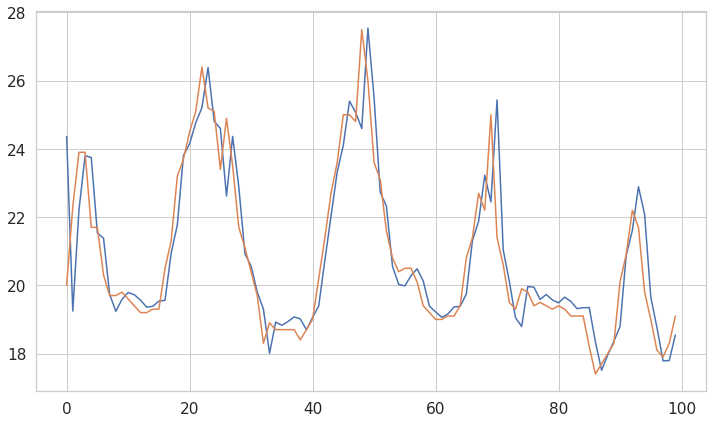

In [91]:
plot_predictions1(test_model, X_test1, y_test1)